<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.4 Logistic Regression

Logistic Regression is used to model a binary dependent variable given a logistic function. However, it's uses can be extended to many things, including the useof gradient descent on binary classification by logistic regression.

Definition:
Given input data in the form {(ai,bi): i =1,...n} where ai ∈ Rd are the features and bi ∈ {0, 1} is the label. We need to find a function of the features that approximate the probability of label 1, such that

log p(a; x) / (1 − p(a; x)) = aT x

This can be reagrranged into the sigmoid function as:

p(a;x) = σ(αTx) =1 / (1+e^(−αTx))


To maximize likelihood of data with gradient descent:

Assume the lables are independent given the features and we have the function:

L (x; A, b) =
n
∏
i=1
p(
αi; x)bi (1 − p(
αi; x))1−bi .

Using gradient descent, the iteration (update rule) of this function equals:

xk+1 = xk +
β (bI −
σ (
αT
I xk))
αI

Where we pic a sample I uniformly random in {1,...,n} and update as follows

ideal parameters according to logistic regression: [0.02730949 3.8933347  3.5622524 ]


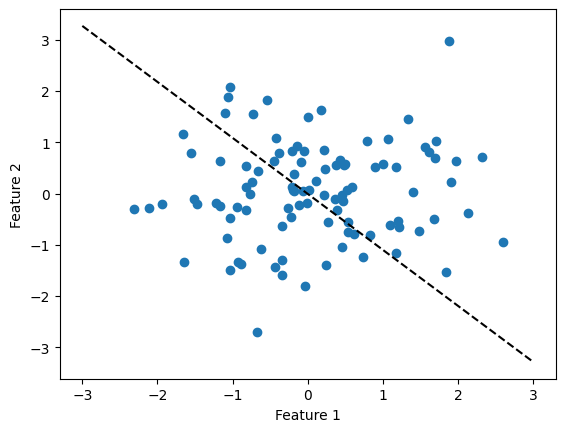

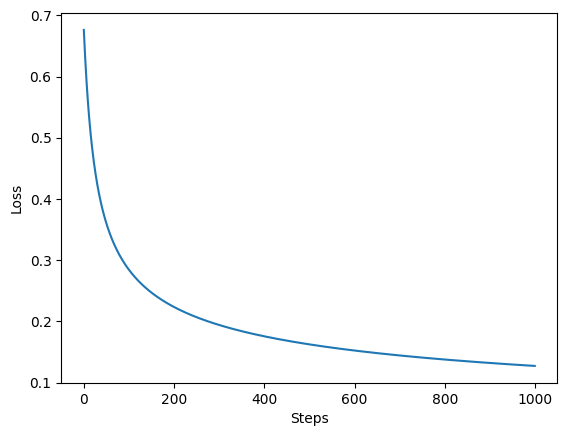

In [20]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(100,2)
#creating feature matrix of length 100 with 2 features
b = (a[:,0] + a[:,1] > 0).astype(int)
#create label array
#For every data point, b = 1 if sum > 0 and b = 0 if sum <= 0.
a = np.hstack([np.ones((100,1)),a])
#adds a column of 1s to the start of the a matrix so a data matches the form 1,...n

def sigmoid(aTx):
  return 1 / (1+np.exp(-aTx))
#calculates the sigmoid function given the parameter aTx
#returns probability predictions

def crossEnropyLoss(a,b, parameters):
  aTx = a @ parameters #gets the aTx parameter by multiplying feature vector by parameters
  p = sigmoid(aTx) #returns probability prediction using sigmoid function
  loss = -np.mean(b * np.log(p) + (1 - b) * np.log(1 - p)) #computes cross entropy loss by the formula
  return loss
#function measures how close regression model is to true label

def grad_desc(a,b,parameters,stepSize,steps):
  m = len(b)
  path = []

  for _ in range(steps):
    aTx = a @ parameters #gets the aTx parameter by multiplying feature vector by parameters
    p = sigmoid(aTx) #returns probability prediction using sigmoid function

    grad = (a.T @ (p-b)) / m
    #calculates gradient for error (p-b) with respect to each parameter
    parameters -= stepSize * grad
    loss = crossEnropyLoss(a,b,parameters)
    path.append(loss)
  return parameters, path

parameters = np.zeros(3)
#creates blank parameters array
stepSize = 0.1
steps = 1000

parameters, path = grad_desc(a, b, parameters, stepSize, steps)
#computes ideal parameters using gradient descent
print("ideal parameters according to logistic regression:", parameters)

#plotting scatter pot of data points
x_vals = np.linspace(-3, 3, 100)  # Generate 100 x values between -3 and 3
y_vals = -(parameters[0] + parameters[1] * x_vals) / parameters[2]
#calculates corresponding y coordinates based on parameters created by logistic regression
plt.scatter(a[:, 1], a[:, 2])
plt.plot(x_vals, y_vals, 'k--')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#plots path of algorythm
plt.plot(path)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()



As shown in the first graph, the algorythm created the optimal boundary line (where almost equal points are dispersed on opposite ends)

As shown in the second graph, the loss decreases as the iterations(steps) grow, which means the model gets more accurate.